In [1]:
#importing all the libraries that may be required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
df=pd.read_excel('Canada.xlsx')
df.head()

,Post Code,Borough,Neighbourhood,Population,Income
0,M4K,East York,Broadview North,11499,44557
1,M4C,East York,Danforth East York,17180,51846
2,M4G,East York,Bennington,16828,125564
3,M4B,East York,O'Connor-Parkview,18675,43907
4,M4H,East York,Thorncliffe Park,21108,28875


In [3]:
# cleaning
df=df.dropna(subset=['Borough','Post Code'],axis=0)
df.head()

,Post Code,Borough,Neighbourhood,Population,Income
0,M4K,East York,Broadview North,11499,44557
1,M4C,East York,Danforth East York,17180,51846
2,M4G,East York,Bennington,16828,125564
3,M4B,East York,O'Connor-Parkview,18675,43907
4,M4H,East York,Thorncliffe Park,21108,28875


In [4]:
fll=pd.read_csv("http://cocl.us/Geospatial_data")
fll.rename(columns={'Postal Code':'Post Code'}, inplace=True)
toronto_data=pd.merge(df, fll)
toronto_data


,Post Code,Borough,Neighbourhood,Population,Income,Latitude,Longitude
0,M4K,East York,Broadview North,11499,44557,43.679557,-79.352188
1,M4C,East York,Danforth East York,17180,51846,43.695344,-79.318389
2,M4C,East York,Woodbine-Lumsden,7865,47710,43.695344,-79.318389
3,M4G,East York,Bennington,16828,125564,43.709060,-79.363452
4,M4B,East York,O'Connor-Parkview,18675,43907,43.706397,-79.309937
5,M4B,East York,Woodbine Corridor,12541,55199,43.706397,-79.309937
6,M4H,East York,Thorncliffe Park,21108,28875,43.705369,-79.349372
7,M8W,Etobicoke,Alderwood,12054,47709,43.602414,-79.543484
8,M8W,Etobicoke,Long Branch,10084,47384,43.602414,-79.543484
9,M8Y,Etobicoke,Edenbridge-Humber Valley,15535,101551,43.636258,-79.498509


Creating population and income dataframe

In [5]:
toronto_population=pd.DataFrame(df[['Borough','Neighbourhood','Population']])
toronto_population.head()

,Borough,Neighbourhood,Population
0,East York,Broadview North,11499
1,East York,Danforth East York,17180
2,East York,Bennington,16828
3,East York,O'Connor-Parkview,18675
4,East York,Thorncliffe Park,21108


In [6]:
toronto_income=pd.DataFrame(df[['Borough','Neighbourhood','Income']])
toronto_income.head()

,Borough,Neighbourhood,Income
0,East York,Broadview North,44557
1,East York,Danforth East York,51846
2,East York,Bennington,125564
3,East York,O'Connor-Parkview,43907
4,East York,Thorncliffe Park,28875


Setting longitude and latitude values of Toronto

In [7]:
lat=toronto_data['Latitude'].mean()
long=toronto_data['Longitude'].mean()
print("The longtiude and latitude of Toronto is ",long,lat)

The longtiude and latitude of Toronto is  -79.39292365384618 43.71304317051282


## Setting foursquare credentials 

In [8]:
CLIENT_ID = 'PRX1YDNRYKRPX2LRI2PUHTJNLYXXJUTJYJPBUH4IJN1QOIE3'
CLIENT_SECRET = 'YCVMCKIWTWCMTJ0BPY4OCNFDMCIE2VMPCKQDTKWIVSCENCKS'
VERSION = '20180606'
LIMIT = 150

In [9]:
unique_boroughs=df['Borough'].unique()
unique_boroughs

array(['East York', 'Etobicoke', 'North York', 'Old Toronto',
       'Scarborough', 'York'], dtype=object)

In [10]:
borough_colors ={}
for i in unique_boroughs:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
borough_colors

{'East York': '#53A176',
 'Etobicoke': '#33CD91',
 'North York': '#D0381E',
 'Old Toronto': '#AFD999',
 'Scarborough': '#9B9B99',
 'York': '#332148'}

In [11]:
toronto_map = folium.Map(location=[lat,long],zoom_start=10,control_scale=True)

In [12]:
for lat,lng,boro,nei in zip(toronto_data['Latitude'],
                           toronto_data['Longitude'],
                           toronto_data['Borough'],
                           toronto_data['Neighbourhood']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(toronto_map)

In [55]:
toronto_map

## Exploring the neighborhoods using FourSquare API

In [13]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [14]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],latitudes=toronto_data['Latitude'],longitudes=toronto_data['Longitude'],boro=toronto_data['Borough'])

Fetching venues for :  Broadview North
Fetching venues for :  Danforth East York
Fetching venues for :  Woodbine-Lumsden
Fetching venues for :  Bennington
Fetching venues for :  O'Connor-Parkview
Fetching venues for :  Woodbine Corridor
Fetching venues for :  Thorncliffe Park
Fetching venues for :  Alderwood
Fetching venues for :  Long Branch
Fetching venues for :  Edenbridge-Humber Valley
Fetching venues for :  New Toronto
Fetching venues for :  Queensway
Fetching venues for :  West Deane
Fetching venues for :  Martingrove
Fetching venues for :  Islington-
Fetching venues for :  Kingsview Village
Fetching venues for :  Markland Wood
Fetching venues for :  Mimico 
Fetching venues for :  Beaumond Heights
Fetching venues for :  Steeles
Fetching venues for :  Jamestown
Fetching venues for :  Don Mills
Fetching venues for :  Bathurst Manor
Fetching venues for :  Bayview Village
Fetching venues for :  York Mills
Fetching venues for :  Downsview
Fetching venues for :  Flemingdon Park
Fetchin

In [15]:
print("Total number of venues found in Toronto are : ",toronto_venues.shape[0])

Total number of venues found in Toronto are :  1075


In [16]:
toronto_venues.head()

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Broadview North,East York,43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
1,Broadview North,East York,43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
2,Broadview North,East York,43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
3,Broadview North,East York,43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
4,Broadview North,East York,43.679557,-79.352188,La Diperie,43.677530,-79.352295,Ice Cream Shop


In [17]:
toronto_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Coffee Shop             70
Pizza Place             39
Café                    35
Bar                     31
Fast Food Restaurant    29
Pharmacy                27
Restaurant              27
Park                    26
Bakery                  25
Grocery Store           22
Name: Neighborhood, dtype: int64

## Getting number of venues per neighborhood

In [18]:
individual_toronto_venue_count = toronto_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [19]:
individual_toronto_venue_count

Borough
Borough     Neighborhood                     
East York   Bennington                     35
            Broadview North                42
            Danforth East York              8
            O'Connor-Parkview              13
            Thorncliffe Park               18
            Woodbine Corridor              13
            Woodbine-Lumsden                8
Etobicoke   Alderwood                      10
            Beaumond Heights               11
            Edenbridge-Humber Valley        1
            Kingsview Village               4
            Long Branch                    10
            Markland Wood                   6
            Martingrove                     1
            Mimico                         12
            New Toronto                     1
            Queensway                       1
            West Deane                      1
North York  Bathurst Manor                 18
            Bayview Village                 4
            Don Mills                       5
            Downsview                       5
            Flemingdon Park                23
            Henry Farm                     66
            Humber Summit                   3
            Newtonbrook West                4
            Parkwoods                       3
            Pelmo Park-Humberlea            1
            Steeles                        11
            Victoria Village                4
...                                       ...
Old Toronto Runnymede                      38
            South Parkdale                 15
            The Beaches                     5
            Trinity                        62
Scarborough Agincourt North                 3
            Clairlea-Birchmount            22
            Cliffcrest                      3
            Cliffside                       3
            Dorset Park                     6
            Guildwood                       9
            Highland Creek                  2
            Ionview                         4
            L'Amoreaux                     12
            Malvern                         2
            Milliken                        3
            Morningside                     9
            Oakridge                       10
            Rouge                           2
            Scarborough Village             1
            Steeles                         3
            Sullivan                       10
            West Hill                       9
            Wexford/Maryvale                6
            Woburn                          4
York        Caledonia-Fairbank              6
            Humewood-Cedarvale              4
            Jamestown                      11
            Keelesdale                      4
            Mount Dennis                    4
            Weston                          2

[76 rows x 1 columns]

In [20]:
individual_toronto_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
individual_toronto_venue_count.reset_index(inplace=True)
individual_toronto_venue_count

,Borough,Neighborhood,NumberOfVenues
0,East York,Bennington,35
1,East York,Broadview North,42
2,East York,Danforth East York,8
3,East York,O'Connor-Parkview,13
4,East York,Thorncliffe Park,18
5,East York,Woodbine Corridor,13
6,East York,Woodbine-Lumsden,8
7,Etobicoke,Alderwood,10
8,Etobicoke,Beaumond Heights,11
9,Etobicoke,Edenbridge-Humber Valley,1


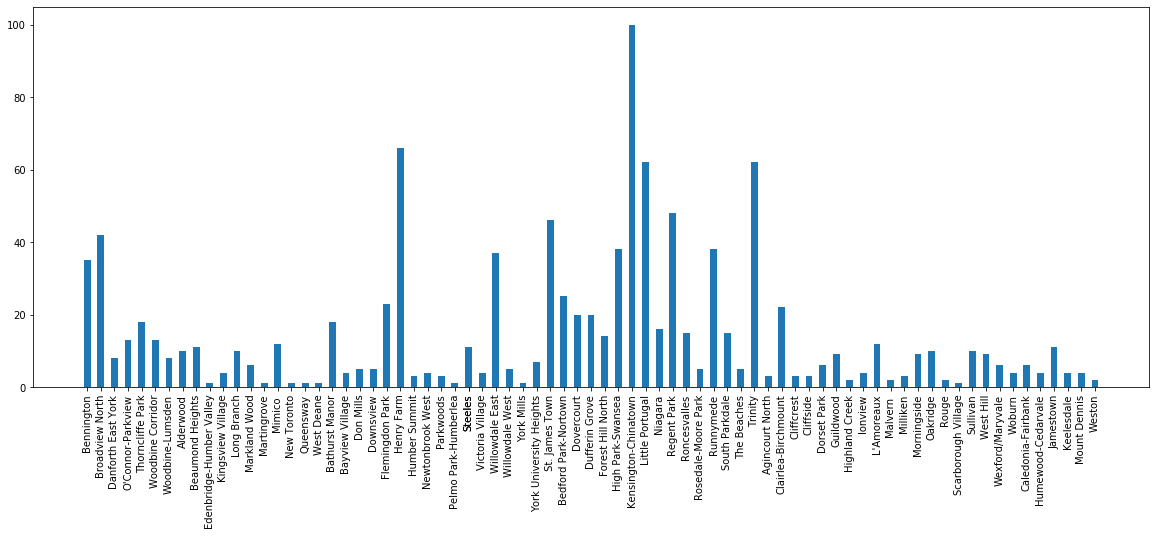

In [21]:
plt.figure(figsize=(20,7))
plt.bar(individual_toronto_venue_count['Neighborhood'],individual_toronto_venue_count['NumberOfVenues'],width=0.5)
plt.xticks(individual_toronto_venue_count['Neighborhood'],fontsize=10,rotation=90)
plt.show()

It is evident from the bar graph that Kensington-Chinatown area has the most number of venues

## Lets explore the venues of some neighborhood say of Regent Park

In [22]:
toronto_venues[toronto_venues['Neighborhood']=='Regent Park']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
844,Regent Park,Old Toronto,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
845,Regent Park,Old Toronto,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
846,Regent Park,Old Toronto,43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,Gym / Fitness Center
847,Regent Park,Old Toronto,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
848,Regent Park,Old Toronto,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
849,Regent Park,Old Toronto,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
850,Regent Park,Old Toronto,43.65426,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
851,Regent Park,Old Toronto,43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
852,Regent Park,Old Toronto,43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
853,Regent Park,Old Toronto,43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site


## One hot encoding for letting us to compare different venues based on some common scale

In [26]:
toronto_dummy=pd.get_dummies(toronto_venues['Venue Category'])
toronto_dummy.dtypes

Airport                            uint8
Airport Food Court                 uint8
Airport Gate                       uint8
Airport Lounge                     uint8
Airport Service                    uint8
Airport Terminal                   uint8
American Restaurant                uint8
Antique Shop                       uint8
Art Gallery                        uint8
Arts & Crafts Store                uint8
Asian Restaurant                   uint8
Athletics & Sports                 uint8
Bagel Shop                         uint8
Bakery                             uint8
Bank                               uint8
Bar                                uint8
Baseball Field                     uint8
Basketball Court                   uint8
Bed & Breakfast                    uint8
Beer Bar                           uint8
Beer Store                         uint8
Belgian Restaurant                 uint8
Bike Shop                          uint8
Bistro                             uint8
Boat or Ferry   

In [27]:
toronto_dummy['Neighborhood'] = toronto_venues['Neighborhood']
toronto_dummy = toronto_dummy.groupby('Neighborhood').mean().reset_index()
toronto_dummy

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,St. James Town,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Agincourt North,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alderwood,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bathurst Manor,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bayview Village,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Beaumond Heights,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Bedford Park-Nortown,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.040000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bennington,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Broadview North,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.023810,0.000000,0.000000,...,0.02381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810
9,Caledonia-Fairbank,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000


## Top 5 venues in each neighbourhood

In [29]:
n=5
for hood in toronto_dummy['Neighborhood']:
    print('-----------',hood,'-----------')
    temp=toronto_dummy[toronto_dummy['Neighborhood']==hood].T.reset_index()
    temp.columns=['Venue','Frequency']
    temp=temp.iloc[1:]
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(n))
    print('\n')

-----------  St. James Town -----------
         Venue  Frequency
0  Coffee Shop  0.0869565
1   Restaurant  0.0652174
2          Pub  0.0434783
3       Bakery  0.0434783
4         Park  0.0434783


----------- Agincourt North -----------
              Venue Frequency
0        Playground  0.333333
1              Park  0.333333
2  Asian Restaurant  0.333333
3     Movie Theater         0
4    Massage Studio         0


----------- Alderwood -----------
            Venue Frequency
0     Pizza Place       0.2
1             Gym       0.1
2    Skating Rink       0.1
3  Sandwich Place       0.1
4             Pub       0.1


----------- Bathurst Manor -----------
         Venue  Frequency
0  Coffee Shop   0.111111
1  Pizza Place  0.0555556
2         Bank  0.0555556
3  Bridal Shop  0.0555556
4     Pharmacy  0.0555556


----------- Bayview Village -----------
                     Venue Frequency
0                     Café      0.25
1       Chinese Restaurant      0.25
2      Japanese Restaurant  

Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [30]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [32]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_dummy['Neighborhood']

for ind in range(toronto_dummy.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_dummy.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. James Town,Coffee Shop,Restaurant,Italian Restaurant,Bakery,Park,Pizza Place,Pub,Café,Japanese Restaurant,Snack Place
1,Agincourt North,Playground,Park,Asian Restaurant,Dessert Shop,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
2,Alderwood,Pizza Place,Sandwich Place,Pub,Pharmacy,Gym,Coffee Shop,Dance Studio,Pool,Skating Rink,Dessert Shop
3,Bathurst Manor,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Shopping Mall,Bridal Shop,Sandwich Place,Restaurant,Fast Food Restaurant,Diner,Supermarket
4,Bayview Village,Bank,Chinese Restaurant,Café,Japanese Restaurant,Yoga Studio,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


## Next challenge is to find the optimal k value for clustering and we do it using the elbow method

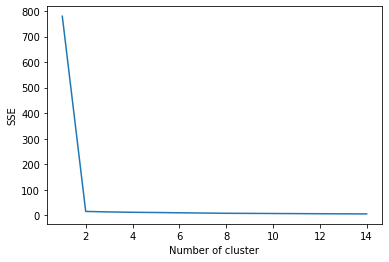

In [35]:
s={}
for k in range(1,15):
    k_means=KMeans(init="k-means++",n_clusters=k,random_state=0)
    k_means.fit((toronto_dummy.drop('Neighborhood',axis=1)))
    toronto_dummy['Cluster']=k_means.labels_
    s[k]=k_means.inertia_
plt.figure()
plt.plot(list(s.keys()), list(s.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


## From the above graph, we can see the optimal value for cluster is 2

In [37]:
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(toronto_dummy.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [39]:
toronto_dummy['Cluster']=kmeans.labels_
toronto_dummy.groupby('Cluster')['Neighborhood'].count()

Cluster
0    54
1    21
Name: Neighborhood, dtype: int64

In [41]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(toronto_dummy,on='Neighborhood')

In [42]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Cluster
0,St. James Town,Coffee Shop,Restaurant,Italian Restaurant,Bakery,Park,Pizza Place,Pub,Café,Japanese Restaurant,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Agincourt North,Playground,Park,Asian Restaurant,Dessert Shop,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Alderwood,Pizza Place,Sandwich Place,Pub,Pharmacy,Gym,Coffee Shop,Dance Studio,Pool,Skating Rink,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Bathurst Manor,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Shopping Mall,Bridal Shop,Sandwich Place,Restaurant,Fast Food Restaurant,Diner,...,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Bayview Village,Bank,Chinese Restaurant,Café,Japanese Restaurant,Yoga Studio,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [43]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(toronto_venues,on='Neighborhood')

In [44]:
# create map
map_clusters = folium.Map(location=[lat, long], zoom_start=11)


In [45]:
# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [77]:
map_clusters

# Finding similar locations based on user input (recommending location)
### We need to analyze factors such as population and Income to recommend.

In [46]:
toronto_income.head()

,Borough,Neighbourhood,Income
0,East York,Broadview North,44557
1,East York,Danforth East York,51846
2,East York,Bennington,125564
3,East York,O'Connor-Parkview,43907
4,East York,Thorncliffe Park,28875


In [47]:
toronto_population.head()

,Borough,Neighbourhood,Population
0,East York,Broadview North,11499
1,East York,Danforth East York,17180
2,East York,Bennington,16828
3,East York,O'Connor-Parkview,18675
4,East York,Thorncliffe Park,21108


In [48]:
toronto_population['Normalized_population'] = toronto_population['Population']/toronto_population['Population'].max(axis=0)
toronto_population.head()

,Borough,Neighbourhood,Population,Normalized_population
0,East York,Broadview North,11499,0.214995
1,East York,Danforth East York,17180,0.321212
2,East York,Bennington,16828,0.314630
3,East York,O'Connor-Parkview,18675,0.349163
4,East York,Thorncliffe Park,21108,0.394653


In [49]:
toronto_income['Normalized_income'] = toronto_income['Income']/toronto_income['Income'].max(axis=0)
toronto_income.head()

,Borough,Neighbourhood,Income,Normalized_income
0,East York,Broadview North,44557,0.144661
1,East York,Danforth East York,51846,0.168326
2,East York,Bennington,125564,0.407662
3,East York,O'Connor-Parkview,43907,0.142551
4,East York,Thorncliffe Park,28875,0.093747


## Lets say the person has a coffee shop bussiness and is looking for places to open up a new branch of his shop

In [50]:
toronto_venues_onehot = pd.get_dummies(toronto_venues[['Venue Category']])
toronto_venues_onehot['Neighborhood'] = toronto_venues['Neighborhood']
toronto_venues_onehot

,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Gate,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Art Gallery,Venue Category_Arts & Crafts Store,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Warehouse Store,Venue Category_Wine Bar,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Broadview North
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Broadview North
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Broadview North
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Broadview North
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Broadview North
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Broadview North
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Broadview North
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Broadview North
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Broadview North
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Broadview North


In [53]:
toronto_coffee = toronto_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
toronto_coffee.head()

,Neighborhood,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Gate,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Art Gallery,...,Venue Category_Trail,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Warehouse Store,Venue Category_Wine Bar,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio
0,St. James Town,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alderwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bathurst Manor,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Bayview Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
toronto_coffee['Venue Category_Coffee Shop']

0     4
1     0
2     1
3     2
4     0
5     1
6     2
7     3
8     4
9     0
10    2
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    1
19    0
20    2
21    2
22    0
23    5
24    3
25    0
26    0
27    0
28    1
29    1
     ..
45    1
46    0
47    0
48    0
49    0
50    0
51    8
52    1
53    0
54    0
55    3
56    0
57    1
58    1
59    0
60    0
61    1
62    3
63    1
64    0
65    0
66    0
67    0
68    3
69    0
70    2
71    0
72    0
73    0
74    1
Name: Venue Category_Coffee Shop, Length: 75, dtype: uint8

In [54]:
toronto_coffee = toronto_coffee[['Neighborhood','Venue Category_Coffee Shop']]

In [55]:
toronto_coffee.rename(columns={'Venue Category_Coffee Shop':'NumberOfCoffeeShop'},inplace=True)

In [56]:
toronto_coffee.head()

,Neighborhood,NumberOfCoffeeShop
0,St. James Town,4
1,Agincourt North,0
2,Alderwood,1
3,Bathurst Manor,2
4,Bayview Village,0


In [57]:
toronto_coffee['NumberOfNonCoffeeShop'] = 1-(toronto_coffee['NumberOfCoffeeShop']/toronto_coffee['NumberOfCoffeeShop'].max(axis=0))

In [58]:
toronto_coffee.head()

,Neighborhood,NumberOfCoffeeShop,NumberOfNonCoffeeShop
0,St. James Town,4,0.500
1,Agincourt North,0,1.000
2,Alderwood,1,0.875
3,Bathurst Manor,2,0.750
4,Bayview Village,0,1.000


# Building a target neighborhood by providing a sample neighborhood : say ' Regent Park ' where the owner already has one branch and is looking for similar places

In [59]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Regent Park']

In [60]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Women's Store,Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,745,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,746,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,747,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,Gym / Fitness Center
3,748,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,749,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
5,750,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
6,751,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
7,752,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
8,753,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
9,754,Regent Park,Coffee Shop,Pub,Bakery,Park,Restaurant,Mexican Restaurant,Breakfast Spot,Café,...,0.0,0.020833,0,Old Toronto,43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site


In [63]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [64]:
print("The target cluster is : ",target_cluster) 

The target cluster is :  0


In [65]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Women's Store,Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. James Town,Coffee Shop,Restaurant,Italian Restaurant,Bakery,Park,Pizza Place,Pub,Café,Japanese Restaurant,...,0.0,0.0,0,Old Toronto,43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner
1,St. James Town,Coffee Shop,Restaurant,Italian Restaurant,Bakery,Park,Pizza Place,Pub,Café,Japanese Restaurant,...,0.0,0.0,0,Old Toronto,43.667967,-79.367675,F'Amelia,43.667536,-79.368613,Italian Restaurant
2,St. James Town,Coffee Shop,Restaurant,Italian Restaurant,Bakery,Park,Pizza Place,Pub,Café,Japanese Restaurant,...,0.0,0.0,0,Old Toronto,43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
3,St. James Town,Coffee Shop,Restaurant,Italian Restaurant,Bakery,Park,Pizza Place,Pub,Café,Japanese Restaurant,...,0.0,0.0,0,Old Toronto,43.667967,-79.367675,Kingyo Toronto,43.665895,-79.368415,Japanese Restaurant
4,St. James Town,Coffee Shop,Restaurant,Italian Restaurant,Bakery,Park,Pizza Place,Pub,Café,Japanese Restaurant,...,0.0,0.0,0,Old Toronto,43.667967,-79.367675,Murgatroid,43.667381,-79.369311,Restaurant


In [67]:
n=possible_neighborhoods['Neighborhood'].unique()
print("There are {} neighborhoods which has similar characteristics to Regent Park.".format(n.shape[0]))


There are 54 neighborhoods which has similar characteristics to Regent Park.


# Now we need to create ranking by combining population and income factors as well

In [68]:
toronto_population.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)
toronto_income.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)

In [69]:
possible_neighborhoods = possible_neighborhoods.merge(toronto_population[['Neighborhood','Population','Normalized_population']],on='Neighborhood')

In [70]:
possible_neighborhoods = possible_neighborhoods.merge(toronto_income[['Neighborhood','Income','Normalized_income']],on='Neighborhood')                            

In [71]:
possible_neighborhoods = possible_neighborhoods.merge(torontotoronto_dummy=toronto_dummy.merge(toronto_population[['Normalized_population']],on='Neighborhood')_coffee[['Neighborhood','NumberOfCoffeeShop','NumberOfNonCoffeeShop']],on='Neighborhood')

In [161]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonCoffeeShop'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [162]:
recommended_neighborhoods

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Income,Normalized_income,NumberOfCoffeeShop,NumberOfNonCoffeeShop,Ranking
0,Woburn,Coffee Shop,Convenience Store,Korean Restaurant,Discount Store,Falafel Restaurant,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant,...,43.770812,-79.214502,Korean Restaurant,53485,1.000000,30878,0.100250,2,0.750,0.610087
1,Woburn,Coffee Shop,Convenience Store,Korean Restaurant,Discount Store,Falafel Restaurant,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant,...,43.772778,-79.222500,Convenience Store,53485,1.000000,30878,0.100250,2,0.750,0.610087
2,Woburn,Coffee Shop,Convenience Store,Korean Restaurant,Discount Store,Falafel Restaurant,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant,...,43.770827,-79.223078,Coffee Shop,53485,1.000000,30878,0.100250,2,0.750,0.610087
3,Woburn,Coffee Shop,Convenience Store,Korean Restaurant,Discount Store,Falafel Restaurant,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant,...,43.770037,-79.221156,Coffee Shop,53485,1.000000,30878,0.100250,2,0.750,0.610087
4,Willowdale East,Coffee Shop,Ramen Restaurant,Sushi Restaurant,Restaurant,Sandwich Place,Japanese Restaurant,Café,Plaza,Bubble Tea Shop,...,43.766579,-79.412131,Steakhouse,50434,0.942956,45326,0.147158,3,0.625,0.585483
5,Willowdale East,Coffee Shop,Ramen Restaurant,Sushi Restaurant,Restaurant,Sandwich Place,Japanese Restaurant,Café,Plaza,Bubble Tea Shop,...,43.766998,-79.412222,Ramen Restaurant,50434,0.942956,45326,0.147158,3,0.625,0.585483
6,Willowdale East,Coffee Shop,Ramen Restaurant,Sushi Restaurant,Restaurant,Sandwich Place,Japanese Restaurant,Café,Plaza,Bubble Tea Shop,...,43.769058,-79.414377,Restaurant,50434,0.942956,45326,0.147158,3,0.625,0.585483
7,Willowdale East,Coffee Shop,Ramen Restaurant,Sushi Restaurant,Restaurant,Sandwich Place,Japanese Restaurant,Café,Plaza,Bubble Tea Shop,...,43.769100,-79.414305,Sushi Restaurant,50434,0.942956,45326,0.147158,3,0.625,0.585483
8,Willowdale East,Coffee Shop,Ramen Restaurant,Sushi Restaurant,Restaurant,Sandwich Place,Japanese Restaurant,Café,Plaza,Bubble Tea Shop,...,43.767097,-79.412263,Restaurant,50434,0.942956,45326,0.147158,3,0.625,0.585483
9,Willowdale East,Coffee Shop,Ramen Restaurant,Sushi Restaurant,Restaurant,Sandwich Place,Japanese Restaurant,Café,Plaza,Bubble Tea Shop,...,43.765995,-79.410813,Japanese Restaurant,50434,0.942956,45326,0.147158,3,0.625,0.585483


In [238]:
temp = recommended_neighborhoods.groupby(['Neighborhood','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()
temp

Neighborhood             1st Most Common Venue       2nd Most Common Venue          3rd Most Common Venue    
 St. James Town          Coffee Shop                 Restaurant                     Italian Restaurant                                        [0.2306888805182819]
Bathurst Manor           Coffee Shop                 Pizza Place                    Middle Eastern Restaurant                                 [0.2755857035858116]
Bayview Village          Bank                        Chinese Restaurant             Café                                                      [0.3591474588840673]
Beaumond Heights         Grocery Store               Pharmacy                       Fast Food Restaurant                                     [0.22163814605518617]
Bedford Park-Nortown     Coffee Shop                 Fast Food Restaurant           Italian Restaurant                                       [0.43207546775076355]
Bennington               Coffee Shop                 Sporting Goods Shop   

In [239]:
#finding the ranking of regent park
r=recommended_neighborhoods.at[1010,'Ranking']
r.dtype

dtype('float64')

In [263]:
#forming a range 
min_r=r-0.15
max_r=r+0.15
recommendation=pd.DataFrame(temp)
recommendation=recommendation.reset_index()
Rank=[]
for x in recommendation['Ranking']:
    y=x[0]
    Rank.append(y)
recommendation['Rank']=Rank
recommendation.drop(['Ranking'],axis=1,inplace=True)
recommendation

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Rank
0,St. James Town,Coffee Shop,Restaurant,Italian Restaurant,0.230689
1,Bathurst Manor,Coffee Shop,Pizza Place,Middle Eastern Restaurant,0.275586
2,Bayview Village,Bank,Chinese Restaurant,Café,0.359147
3,Beaumond Heights,Grocery Store,Pharmacy,Fast Food Restaurant,0.221638
4,Bedford Park-Nortown,Coffee Shop,Fast Food Restaurant,Italian Restaurant,0.432075
5,Bennington,Coffee Shop,Sporting Goods Shop,Sushi Restaurant,0.362497
6,Broadview North,Greek Restaurant,Coffee Shop,Ice Cream Shop,0.208129
7,Clairlea-Birchmount,Coffee Shop,Café,Breakfast Spot,0.368429
8,Cliffcrest,Motel,American Restaurant,Dim Sum Restaurant,0.299781
9,Cliffside,Motel,American Restaurant,Dim Sum Restaurant,0.370156


In [270]:
#re=recommendation[recommendation['Rank']>=min_r and recommendation['Rank']<=max_r ]
top3=recommendation[recommendation['Rank'].between(min_r,max_r)].head(3)

In [271]:
top3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Rank
0,St. James Town,Coffee Shop,Restaurant,Italian Restaurant,0.230689
1,Bathurst Manor,Coffee Shop,Pizza Place,Middle Eastern Restaurant,0.275586
3,Beaumond Heights,Grocery Store,Pharmacy,Fast Food Restaurant,0.221638


### Here, according the data, we see that 'St. James Town, Bathurst Manor and BathurstManor' are top 3 neighborhoods to open up a new branch like the one of Regen Park's Coffee Shop !

### Here our model will recommend these neighborhoods as optimal places to open up a shop.